# Exposición detallada de los tipos de vehículos por ruta

In [1]:
import osmnx as ox
import networkx as nx 
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd

Se recupera el modelo detallado.

In [2]:
with open('modelos/ROI_OSMNX.pickle', 'rb') as handle:
    graph = pickle.load(handle)

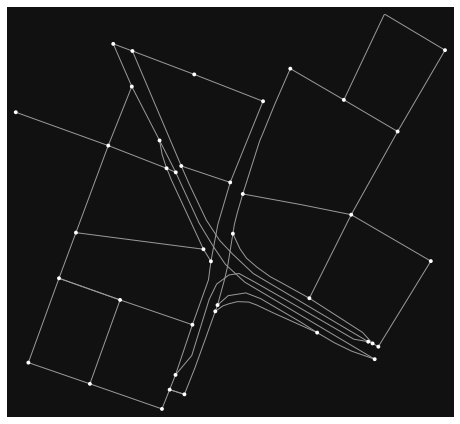

In [3]:
fig, ax = ox.plot_graph(graph)

Los nodos tienen un id que permite identificarlos.

In [7]:
img = plt.imread('./imgs/modelo_detalle.PNG')

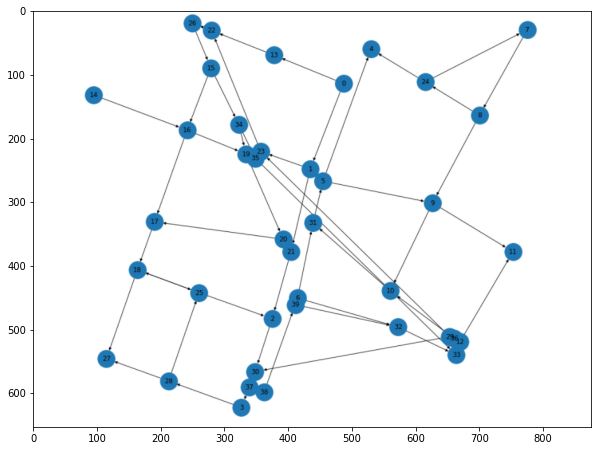

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(img)

Se vuelve a extraer los diccionarios que contienen los ids.

In [4]:
pos = {}
labs_dict = {}
lab2graph = {}
for idx,node in enumerate(graph.nodes):
    pos[node]=(graph.nodes[node]['x'],graph.nodes[node]['y'])
    labs_dict[node]=idx
    lab2graph[idx] = node

## Función de impresión

In [5]:
#mostrará la cantidad de vehículos que existen 
def show_vhq_type(per,graph,nodes,size = (5,5)):
    #no muestra otros nodos
    colors = [0] * len(graph.nodes)
    #colores para cada tipo de vehículo
    route_colors = ['c','r','y','b','g']*10
    #gráfico por cada tipo de vehículo
    for i in range(len(per)):
        print(round(per[i]*100,2),'%')
        fig, ax =ox.plot_graph_route(graph,nodes,
                            node_color = colors,
                            route_linewidth = per[i]*10, #uso de los porcentajes
                            route_color = route_colors[i],
                            figsize=size)

## Flujo de vehículos por ruta

### Ruta 6 - 31

Se extrae los datos del conteo alamacenados en un csv generado por el módulo: [detector de flujo urbano](../detector_flujo_urbano/Readme.md).

In [15]:
data = pd.read_csv('../detector_flujo_urbano/conteo_sur_or_ab.csv')

In [16]:
data.head()

,num_ligeros,num_pesados,num_motos,num_personas,num_taxis
0,16,1,43,36,7


Se obtienen los datos de ligeros, pesados y taxis.

In [18]:
cantidades = [data.iloc[0][0], data.iloc[0][1], data.iloc[0][4]]

Se generan los porcentajes.

In [19]:
porcentajes = np.array(cantidades)/np.sum(cantidades)
porcentajes 

array([0.66666667, 0.04166667, 0.29166667])

Se muestran los resultados gráficamente.

66.67 %


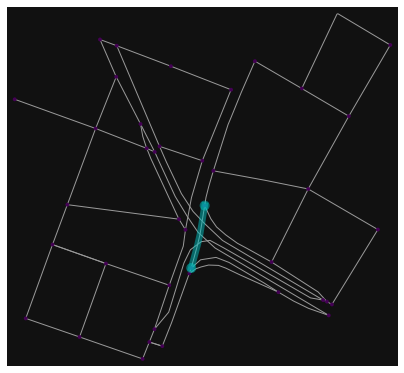

4.17 %


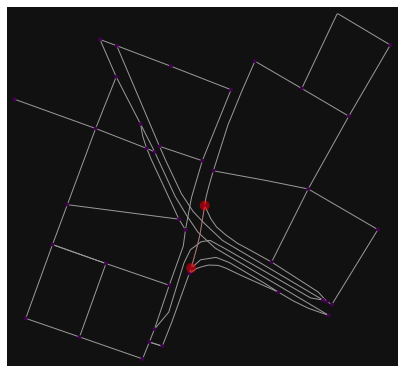

29.17 %


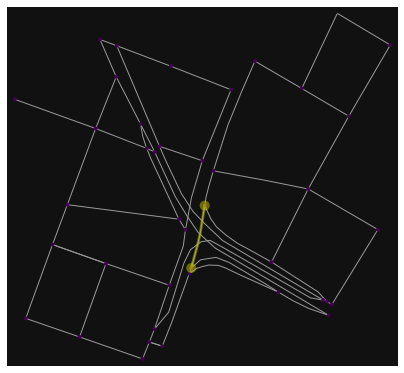

In [21]:
show_vhq_type(porcentajes,graph,[lab2graph[6],lab2graph[31]],size=(7,7))

Puede observarse que los vehículos ligeros son los más abundantes.

### Ruta 6 - 32

Se repite el procedimiento de extracción.

In [23]:
data = pd.read_csv('../detector_flujo_urbano/conteo_sur_or_ai.csv')
cantidades = [data.iloc[0][0], data.iloc[0][1], data.iloc[0][4]]
porcentajes = np.array(cantidades)/np.sum(cantidades)

Se visualiza la información y se concluye.

37.5 %


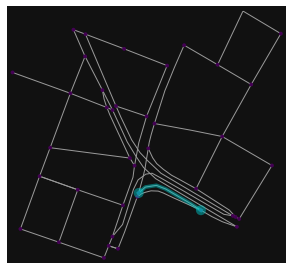

0.0 %


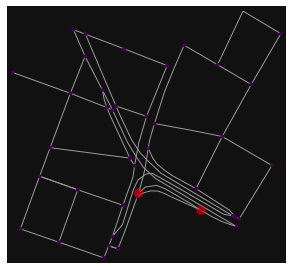

62.5 %


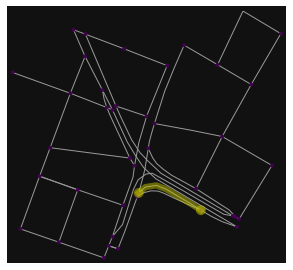

In [24]:
show_vhq_type(porcentajes,graph,[lab2graph[6],lab2graph[32]])

En esta ruta, los taxis son más numerosos y no hay presencia de buses.

### Rutas: 35 - 33, 29 - 23

Al momento de recopilar la información, se utilizó un mismo video para el conteo vehicular en ambas direcciones. Esto se puede volver más específico [modificando las zonas de salida](../detector_flujo_urbano/notebooks/Modificar_exitZ.ipynb), consigueindo el número exacto de vehículos que va en la ruta norte-sur y sur-norte por separado. En este caso, para mantener la simpleza y ya que se trabaja con porcentajes, se asume que el flujo vehicular en ambas rutas es similar.

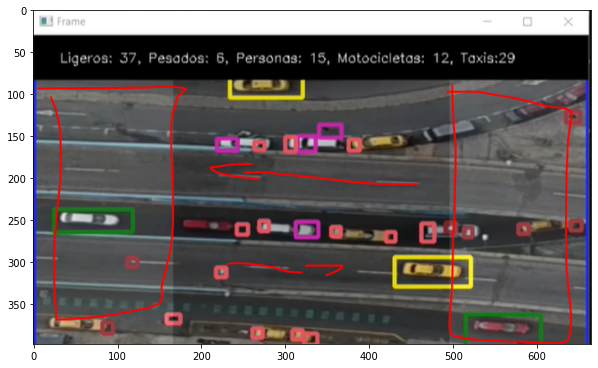

In [4]:
img = plt.imread('./imgs/doble_sentido.PNG')
plt.figure(figsize=(10,10))
plt.imshow(img)

In [11]:
data = pd.read_csv('../detector_flujo_urbano/conteo_sur_or_id.csv')

Se van a utilizar todos los datos que se tengan sobre estas rutas, así que se extraerá información de varios datasets. En los videos de ejemplo se puede observar que las mismas rutas son grabadas desde distintos puntos en momentos diferentes.

In [8]:
data2 = pd.read_csv('../detector_flujo_urbano/conteo_p_g_d.csv')
data3 = pd.read_csv('../detector_flujo_urbano/conteo_p_g_i.csv')
data4 = pd.read_csv('../detector_flujo_urbano/conteo_nor_or_id.csv')
data4 = pd.read_csv('../detector_flujo_urbano/conteo_nor_oc_d.csv')

In [12]:
datos = [data,data2,data3,data4]
frames = pd.concat(datos)

In [13]:
frames

,num_ligeros,num_pesados,num_motos,num_personas,num_taxis
0,37,6,12,18,30
0,23,14,4,28,18
0,37,6,0,17,26
0,25,5,8,0,17


In [14]:
cantidades = np.array([0,0,0])

for i in range(len(frames)):
    cantidades += np.array([frames.iloc[i][0], frames.iloc[i][1], frames.iloc[i][4]])
cantidades

array([122,  31,  91])

In [15]:
porcentajes = cantidades/np.sum(cantidades)

Se modifica la función para observar varias rutas.

In [6]:
#mostrará la cantidad de vehículos que existen 
def show_vhq_type_routes(per,graph,routes,size = (5,5)):
    #no muestra otros nodos
    colors = [0] * len(graph.nodes)
    #colores para cada tipo de vehículo
    route_colors = ['c','r','y','b','g']*10
    
    #gráfico por cada tipo de vehículo
    for i in range(len(per)):
        print(round(per[i]*100,2),'%')
        #se muestran varias rutas    
        fig, ax =ox.plot_graph_routes(graph,routes,
                            node_color = colors,
                            route_linewidth = per[i]*10, #uso de los porcentajes
                            route_colors = [route_colors[i]]*2,
                            figsize=size)
        

Se ingresa una lista de pares de nodos que representa las rutas.

In [17]:
rutas = [[lab2graph[35],lab2graph[33]],[lab2graph[29],lab2graph[23]]]

50.0 %


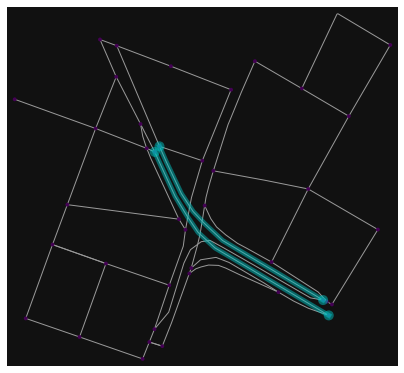

12.7 %


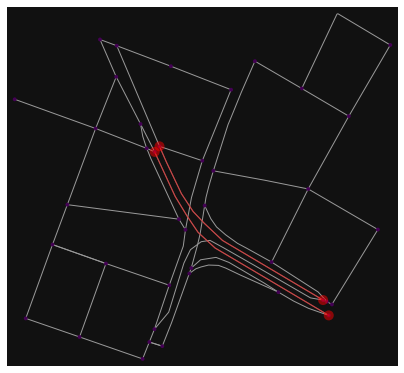

37.3 %


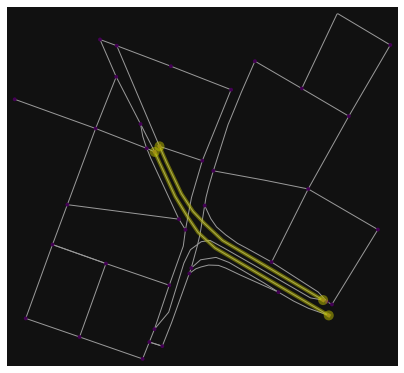

In [18]:
show_vhq_type_routes(porcentajes,graph,rutas,size=(7,7))

Sobre el puente se puede ver que los autos ligeros conforman la mitad del flujo urbano. Los vehículos pesados representan un poco más del 10% y los taxis son otra gran parte del tráfico.

### Rutas: 31 - 5, 1 - 21

Al igual que en el caso anterior, se utilizó un mismo video para ambas direcciones y se asume que el porcentaje vehicular será similar.

In [20]:
data = pd.read_csv('../detector_flujo_urbano/conteo_nor_oc_ab.csv')

De forma similar, hay varios videos que captan estas rutas en distintos puntos y momentos.

In [23]:
data2 = pd.read_csv('../detector_flujo_urbano/conteo_nor_or_ab.csv')
data3 = pd.read_csv('../detector_flujo_urbano/conteo_p_g_ab.csv')

In [24]:
datos = [data,data2,data3]
frames = pd.concat(datos)
frames

,num_ligeros,num_pesados,num_motos,num_personas,num_taxis
0,30,1,10,61,17
0,41,2,14,16,12
0,20,1,4,15,13


In [25]:
cantidades = np.array([0,0,0])

for i in range(len(frames)):
    cantidades += np.array([frames.iloc[i][0], frames.iloc[i][1], frames.iloc[i][4]])
cantidades


array([91,  4, 42])

In [26]:
porcentajes = np.array(cantidades)/np.sum(cantidades)

Rutas de los nodos involucrados.

In [27]:
rutas = [[lab2graph[31],lab2graph[5]],[lab2graph[1],lab2graph[21]]]

Representación gráfica.

66.42 %


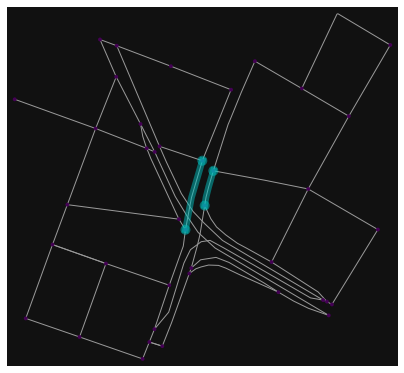

2.92 %


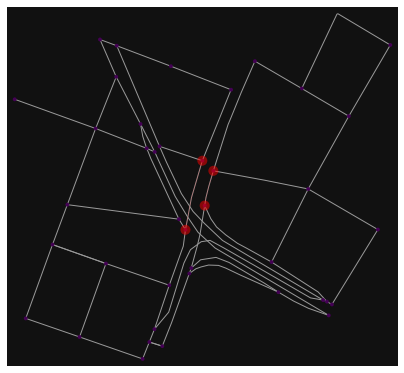

30.66 %


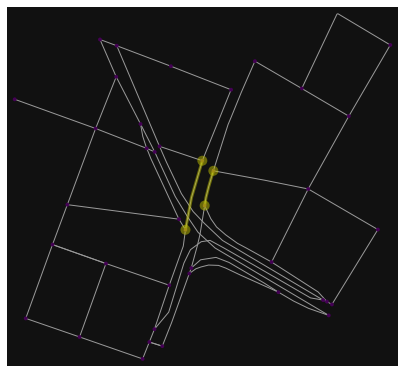

In [28]:
show_vhq_type_routes(porcentajes,graph,rutas,size=(7,7))

Se puede observar que la presencia de vehículos pesados es prácticamente nula en comparación a vehículos ligeros. Los taxis siguen representando cerca de un 30%.